Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

[solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission449Solutions.Rmd).

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5,000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

We have arrived at the following mean values:

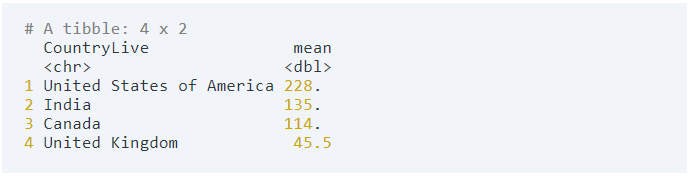

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like `GDP per capita`), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

After eliminating the extreme outliers, we found the following mean values:

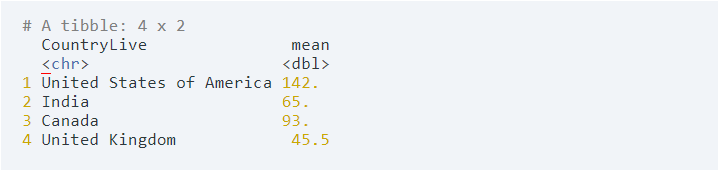


There's not only one solution in this case, and we might have found solid arguments to take different decisions with respect to eliminating some of the outliers. 

Considering the results we've found so far, one country we should definitely advertise in is the **US**. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

We need to choose one more market though.

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

We might have reached different conclusions, which is totally fine, as long as we constructed a sound reasoning for those conclusions. 

We can also continue working on this project. Next steps include:

* Finding other criteria for choosing the best market.
* Analyzing other data sets:
    - [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey).
    - [Stack Overflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).
    
* Improving our project from a stylistical point of view by following the guidelines discussed [in this style guide](https://www.dataquest.io/blog/data-science-project-style-guide/).

# Solution

### Finding the Two Best Markets to Advertise in an E-learning Product

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

### Understanding the Data

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the `2017-fCC-New-Coders-Survey-Data.csv` file stored in the `clean-data` folder of the repository we just mentioned. We'll read in the file using the direct link [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).


```{r}
library(readr)
fcc <- read_csv("2017-fCC-New-Coders-Survey-Data.csv")
dim(fcc)
head(fcc, 5)
```

### Checking for Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What locations have the greatest densities of new coders.
* How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column [^1] and determine whether the data we have is relevant.



```{r}
#split-and-combine workflow
library(dplyr)
fcc %>%
  group_by(JobRoleInterest) %>%
  summarise(freq = n()*100/nrow(fcc)) %>%
  arrange(desc(freq))
```

The information in the table above is quite granular, but from a quick scan it looks like:

* A lot of people are interested in web development (full-stack _web development_, front-end _web development_ and back-end _web development_).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

- Split each string in the `JobRoleInterest` column to find the number of options for each participant.
    - We'll first drop the NA values [^2] because we cannot split NA values.
- Generate a frequency table for the variable describing the number of options [^3].

```{r}
# Split each string in the 'JobRoleInterest' column
splitted_interests <- fcc %>%
  select(JobRoleInterest) %>%
  tidyr::drop_na() %>%
  rowwise %>% #Tidyverse actually makes by default operation over columns, rowwise changes this behavior.
  mutate(opts = length(stringr::str_split(JobRoleInterest, ",")[[1]]))
  
# Frequency table for the var describing the number of options
n_of_options <- splitted_interests %>%
  ungroup() %>%  #this is needeed because we used the rowwise() function before
  group_by(opts) %>%
  summarize(freq = n()*100/nrow(splitted_interests))
  
n_of_options
```

It turns out that only 31.65% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

```{r}
# Frequency table (we can also use split-and-combine) 
web_or_mobile <- stringr::str_detect(fcc$JobRoleInterest, "Web Developer|Mobile Developer")
freq_table <- table(web_or_mobile)

freq_table <- freq_table * 100 / sum(freq_table)

freq_table

# Graph for the frequency table above

df <- tibble::tibble(x = c("Other Subject","Web or Mobile Developpement"),
                       y = freq_table)
library(ggplot2)
ggplot(data = df, aes(x = x, y = y, fill = x)) +
  geom_histogram(stat = "identity")
```

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

### New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the `CountryLive` variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.



```{r}
# Isolate the participants that answered what role they'd be interested in

fcc_good <- fcc %>%
  tidyr::drop_na(JobRoleInterest) 
  
# Frequency tables with absolute and relative frequencies
# Display the frequency tables in a more readable format

fcc_good %>%
group_by(CountryLive) %>%
summarise(`Absolute frequency` = n(),
          `Percentage` = n() * 100 /  nrow(fcc_good) ) %>%
  arrange(desc(Percentage))
```

44.69% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.55%, which is not too far from the United Kingdom (4.50%) or Canada (3.71%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

### Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the `MonthsProgramming` column.



```{r}
# Replace 0s with 1s to avoid division by 0
fcc_good <- fcc_good %>%
  mutate(MonthsProgramming = replace(MonthsProgramming,  MonthsProgramming == 0, 1) )
  
# New column for the amount of money each student spends each month
fcc_good <- fcc_good %>%
  mutate(money_per_month = MoneyForLearning/MonthsProgramming) 
  
fcc_good %>%
  summarise(na_count = sum(is.na(money_per_month)) ) %>%
  pull(na_count)
```

Let's keep only the rows that don't have NA values for the `money_per_month` column.

```{r}
# Keep only the rows with non-NAs in the `money_per_month` column 

fcc_good  <-  fcc_good %>% tidyr::drop_na(money_per_month)
```

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having `NA` values for the `CountryLive` column, and check out if we still have enough data for the four countries that interest us.


```{r}
# Remove the rows with NA values in 'CountryLive'
fcc_good  <-  fcc_good %>% tidyr::drop_na(CountryLive)
        
# Frequency table to check if we still have enough data
fcc_good %>% group_by(CountryLive) %>%
  summarise(freq = n() ) %>%
  arrange(desc(freq)) %>%
  head()
```

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

```{r}
# Mean sum of money spent by students each month
countries_mean  <-  fcc_good %>% 
  filter(CountryLive == 'United States of America' | CountryLive == 'India' | CountryLive == 'United Kingdom'|CountryLive == 'Canada') %>%
  group_by(CountryLive) %>%
  summarize(mean = mean(money_per_month)) %>%
  arrange(desc(mean))
  
countries_mean
```


The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://bit.ly/2I3cukh)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

### Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the `money_per_month` variable for each country.

```{r}
# Isolate only the countries of interest
only_4  <-  fcc_good %>% 
  filter(CountryLive == 'United States of America'
         | CountryLive == 'India' | CountryLive == 'United Kingdom'|CountryLive == 'Canada')
    
# Since maybe, we will remove elements from the database, 
# we add an index column containing the number of each row. 
# Hence, we will have a match with the original database in case of some indexes.

only_4 <- only_4 %>%
  mutate(index = row_number())
    
# Box plots to visualize distributions

ggplot( data = only_4, aes(x = CountryLive, y = money_per_month)) +
  geom_boxplot() +
  ggtitle("Money Spent Per Month Per Country\n(Distributions)") +
  xlab("Country") +
  ylab("Money per month (US dollars)") +
  theme_bw()
```

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month `$50,000` or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over `$20,000` per month.


```{r}
# Isolate only those participants who spend less than 10,000 per month

fcc_good  <- fcc_good %>% 
  filter(money_per_month < 20000)
```


Now let's recompute the mean values and plot the box plots again.


```{r}
# Mean sum of money spent by students each month

countries_mean = fcc_good %>% 
  filter(CountryLive == 'United States of America' | CountryLive == 'India' | CountryLive == 'United Kingdom'|CountryLive == 'Canada') %>%
  group_by(CountryLive) %>%
  summarize(mean = mean(money_per_month)) %>%
  arrange(desc(mean))
  
countries_mean
```

```{r}
# Isolate only the countries of interest
only_4  <-  fcc_good %>% 
  filter(CountryLive == 'United States of America' | CountryLive == 'India' | CountryLive == 'United Kingdom'|CountryLive == 'Canada') %>%
  mutate(index = row_number())

# Box plots to visualize distributions
ggplot( data = only_4, aes(x = CountryLive, y = money_per_month)) +
  geom_boxplot() +
  ggtitle("Money Spent Per Month Per Country\n(Distributions)") +
  xlab("Country") +
  ylab("Money per month (US dollars)") +
  theme_bw()
```

We can see a few extreme outliers for India (values over \$2,500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

```{r}
# Inspect the extreme outliers for India
india_outliers  <-  only_4 %>%
  filter(CountryLive == 'India' & 
           money_per_month >= 2500)
    
india_outliers
```

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_, so they might have misunderstood and thought university tuition is included. It seems safer to remove these six rows.


```{r}
# Remove the outliers for India
only_4 <-  only_4 %>% 
  filter(!(index %in% india_outliers$index))
```

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6,000 per month). Let's examine these participants in more detail.

```{r}
# Examine the extreme outliers for the US
us_outliers = only_4 %>%
  filter(CountryLive == 'United States of America' & 
           money_per_month >= 6000)
    
us_outliers

only_4  <-  only_4 %>% 
  filter(!(index %in% us_outliers$index))
```

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6,000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.


```{r}
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4 %>%
    filter(CountryLive == 'United States of America' & 
           money_per_month >= 6000 &
             AttendedBootcamp == 0)
    
only_4_  <-  only_4 %>% 
  filter(!(index %in% no_bootcamp$index))
    
# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4 %>%
    filter(CountryLive == 'United States of America' & 
           money_per_month >= 6000 &
           MonthsProgramming <= 3)
    
only_4  <-  only_4 %>% 
  filter(!(index %in% less_than_3_months$index))
```

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5,000 per month. Let's examine this person in more depth.

```{r}
# Examine the extreme outliers for Canada
canada_outliers = only_4 %>%
  filter(CountryLive == 'Canada' & 
           money_per_month >= 4500 &
           MonthsProgramming <= 3)
    
canada_outliers
```

Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

```{r}
# Remove the extreme outliers for Canada
only_4  <-  only_4 %>% 
  filter(!(index %in% canada_outliers$index))
```

Let's recompute the mean values and generate the final box plots.

```{r}
# Mean sum of money spent by students each month
countries_mean = only_4 %>%
  group_by(CountryLive) %>%
  summarize(mean = mean(money_per_month)) %>%
  arrange(desc(mean))
    
countries_mean
```

```{r}
# Box plots to visualize distributions
ggplot( data = only_4, aes(x = CountryLive, y = money_per_month)) +
  geom_boxplot() +
  ggtitle("Money Spent Per Month Per Country\n(Distributions)") +
  xlab("Country") +
  ylab("Money per month (US dollars)") +
  theme_bw()
```

## Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of `$59` per month, and Canada seems to be the best second choice because people there are willing to pay roughly `$93` per month, compared to India (`$66`) and the United Kingdom (`$45`).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* `$59` doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
* We have almost twice as more potential customers in India than we have in Canada:

```{r}
# Frequency table for the 'CountryLive' column
only_4 %>% group_by(CountryLive) %>%
  summarise(freq = n() * 100 / nrow(only_4) ) %>%
  arrange(desc(freq)) %>%
  head()
```

```{r}
# Frequency table to check if we still have enough data
only_4 %>% group_by(CountryLive) %>%
  summarise(freq = n() ) %>%
  arrange(desc(freq)) %>%
  head()
```


So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

# Documentation
[^1]: We can use the [Split-and-Combine workflow](https://app.dataquest.io/m/339/a/5).

[^2]: We can use the [`drop_na()` function](https://app.dataquest.io/m/326/a/6).

[^3]: We can use the [`stringr::str_split()` function](https://app.dataquest.io/m/342/a/6).